In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import animation
from scipy.fftpack import fft,ifft
from matplotlib import rc
rc('animation', html='jshtml')
from animate_wave import save_wave
from schrodinger_class import Schrodinger

In [2]:
def gauss_x(x, a, x0, k0):
    #wave with width a, centred at x0 with momentum k0
    return((a * np.sqrt(np.pi)) ** (-0.5) * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))
    #this is just a standard gaussian function

## A Single Gaussian Barrier

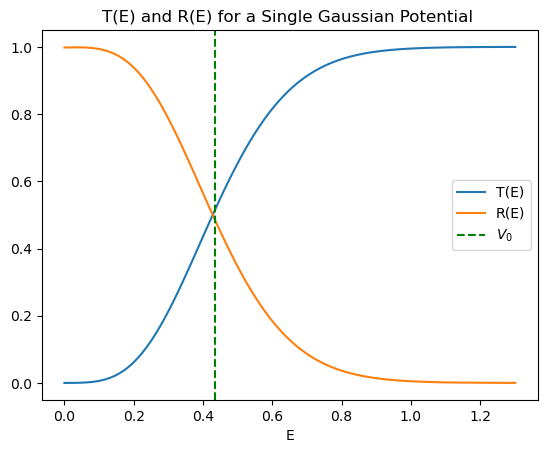

In [20]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
# x = dx * (np.arange(N) - 0.5 * N)
x=np.arange(-600,600,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * ((x - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
# V_x[x < -598] = 1E6 
# V_x[x > 598] = 1E6

#variables
dt = 0.01
N_steps = 50s
t_max = 200
frames = 501

energies = np.linspace(0, 3*V0, 100)

reflections = []
transmissions = []

for E in energies:    
    #specifying constants
    hbar = 1.0  
    m = 1.0 #mass    
    p0 = np.sqrt(2 * m  * E) #intial momentum
    k0 = p0 / hbar #intial wave number
    v0 = p0 / m #initial velocity
    d = 4.0 #initial width of wavepacket
    x0 = -20 #initial centre of wavepacket 
    k0_ft_y = -np.pi / dy

    psi_x0 = gauss_x(x, d, x0, k0)

    inputpsi = psi_x0
#     S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
    
    for i in range(frames):
        S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
        S.time_step(dt, N_steps)
        inputpsi = S.psi_x
        
    index = []
    for i in range(len(x)):
        if V_x[i]>0.01:
            index.append(i)
    
    modsquared = np.abs(inputpsi)**2

    reflection = np.sum(modsquared[0:np.min(index)-1])*0.1
    transmission = np.sum(modsquared[np.max(index):-1])*0.1
    
    reflections.append(reflection)
    transmissions.append(transmission)
    


plt.plot(energies,transmissions, label = 'T(E)')    
plt.plot(energies,reflections, label = 'R(E)')
plt.axvline(V0 , linestyle = '--', c = 'g', label = '$V_{0}$')
plt.title('T(E) and R(E) for a Single Gaussian Potential ')
plt.xlabel('E')
plt.legend()
plt.savefig('RandT_Single_Gaussian', dpi=500)


#     xlim = (-600, 600)
#     ylim = (0,0.6)
#     save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name=f'single_barrier_{E}', scaling = 1.5, save=True)


## A Rectangular Barrier

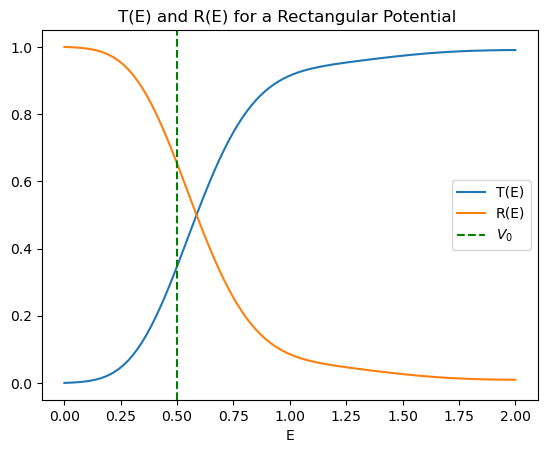

In [21]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
# x = dx * (np.arange(N) - 0.5 * N)
x=np.arange(-800,800,0.1)
dy = dx
y = x

#potential barrier
def rectangular_barrier(x, a, b, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a and x[i]<= b:
            potential[i] = V0
        if x[i]>b:
            potential[i] = 0
    return potential

V0 = 0.5
a = -2
b = 2
V_x = rectangular_barrier(x,a,b,V0)

#potential 'walls' at either end
# V_x[x < -798] = 1E6 
# V_x[x > 798] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 501

energies = np.linspace(0, 4*V0, 100)

reflections = []
transmissions = []

for E in energies:    
    #specifying constants
    hbar = 1.0  
    m = 1.0 #mass    
    p0 = np.sqrt(2 * m  * E) #intial momentum
    k0 = p0 / hbar #intial wave number
    v0 = p0 / m #initial velocity
    d = 4.0 #initial width of wavepacket
    x0 = -20 #initial centre of wavepacket 
    k0_ft_y = -np.pi / dy

    psi_x0 = gauss_x(x, d, x0, k0)

    inputpsi = psi_x0
#     S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
    
    for i in range(frames):
        S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
        S.time_step(dt, N_steps)
        inputpsi = S.psi_x
        
    index = []
    for i in range(len(x)):
        if V_x[i]>0.01:
            index.append(i)
    
    modsquared = np.abs(inputpsi)**2

    reflection = np.sum(modsquared[0:np.min(index)-1])*0.1
    transmission = np.sum(modsquared[np.max(index):-1])*0.1
    
    reflections.append(reflection)
    transmissions.append(transmission)
    


plt.plot(energies,transmissions, label = 'T(E)')    
plt.plot(energies,reflections, label = 'R(E)')
plt.axvline(V0 , linestyle = '--', c = 'g', label = '$V_{0}$')
plt.title('T(E) and R(E) for a Rectangular Potential ')
plt.xlabel('E')
plt.legend()
plt.savefig('RandT_Rectangle', dpi=500)


#     xlim = (-800, 800)
#     ylim = (0,0.6)
#     save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name=f'single_barrier_{E}', scaling = 1.5, save=True)


## A Long Rectangular Barrier

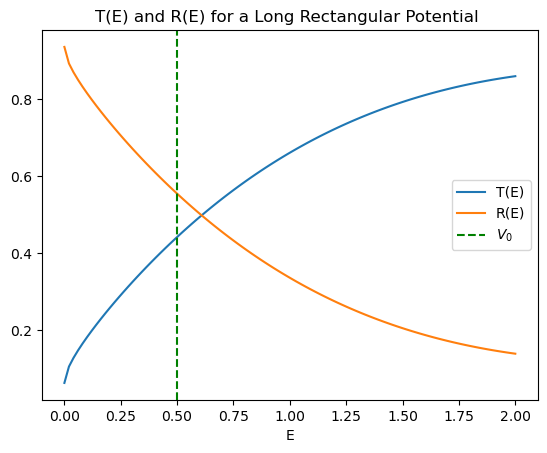

In [3]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
# x = dx * (np.arange(N) - 0.5 * N)
x=np.arange(-800,800,0.1)
dy = dx
y = x

#potential barrier
def rectangular_barrier(x, a, b, V0):
    potential = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<a:
            potential[i] = 0
        if x[i]>= a and x[i]<= b:
            potential[i] = V0
        if x[i]>b:
            potential[i] = 0
    return potential

V0 = 0.5
a = -10
b = 10
V_x = rectangular_barrier(x,a,b,V0)

#potential 'walls' at either end
# V_x[x < -798] = 1E6 
# V_x[x > 798] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 501

energies = np.linspace(0, 4*V0, 100)

reflections = []
transmissions = []

for E in energies:    
    #specifying constants
    hbar = 1.0  
    m = 1.0 #mass    
    p0 = np.sqrt(2 * m  * E) #intial momentum
    k0 = p0 / hbar #intial wave number
    v0 = p0 / m #initial velocity
    d = 1.0 #initial width of wavepacket
    x0 = -40 #initial centre of wavepacket 
    k0_ft_y = -np.pi / dy

    psi_x0 = gauss_x(x, d, x0, k0)

    inputpsi = psi_x0
#     S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
    
    for i in range(frames):
        S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
        S.time_step(dt, N_steps)
        inputpsi = S.psi_x
    
    index = []
    for i in range(len(x)):
        if V_x[i]>0.01:
            index.append(i)
    
    modsquared = np.abs(inputpsi)**2

    reflection = np.sum(modsquared[0:np.min(index)-1])*0.1
    transmission = np.sum(modsquared[np.max(index):-1])*0.1
    
    reflections.append(reflection)
    transmissions.append(transmission)
    


plt.plot(energies,transmissions, label = 'T(E)')    
plt.plot(energies,reflections, label = 'R(E)')
plt.axvline(V0 , linestyle = '--', c = 'g', label = '$V_{0}$')
plt.title('T(E) and R(E) for a Long Rectangular Potential ')
plt.xlabel('E')
plt.legend()
plt.savefig('RandT_Long_Rectangle', dpi=500)


#     xlim = (-800, 800)
#     ylim = (0,0.6)
#     save_wave(xlim=xlim, ylim=ylim, S=S, frames=frames, dt=dt, N_steps=N_steps, name=f'single_barrier_{E}', scaling = 1.5, save=True)


## A Double Equal Gaussian Barrier

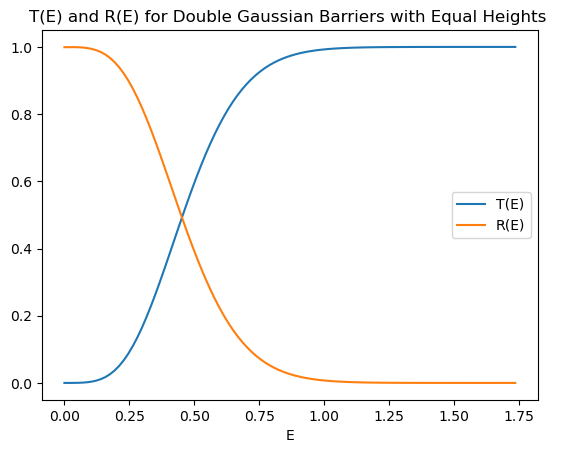

In [8]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
x = np.arange(-200,200,0.1)
dy = dx
y = x

#potential barrier
def gauss_barrier(x, a, x0):
    x = np.asarray(x)
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2) + (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
# V_x[x < -198] = 1E6 
# V_x[x > 198] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 251


energies = np.linspace(0, 4*V0, 100)

reflections = []
transmissions = []

for E in energies:    
    #specifying constants
    hbar = 1.0  
    m = 1.0 #mass    
    p0 = np.sqrt(2 * m  * E) #intial momentum
    k0 = p0 / hbar #intial wave number
    v0 = p0 / m #initial velocity
    d = 4.0 #initial width of wavepacket
    x0 = -40 #initial centre of wavepacket 
    k0_ft_y = -np.pi / dy

    psi_x0 = gauss_x(x, d, x0, k0)

    inputpsi = psi_x0
#     S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
    
    for i in range(frames):
        S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
        S.time_step(dt, N_steps)
        inputpsi = S.psi_x
        
    index = []
    for i in range(len(x)):
        if V_x[i]>0.01:
            index.append(i)
    
    modsquared = np.abs(inputpsi)**2

    reflection = np.sum(modsquared[0:np.min(index)-1])*0.1
    transmission = np.sum(modsquared[np.max(index):-1])*0.1
    
    reflections.append(reflection)
    transmissions.append(transmission)
    


plt.plot(energies,transmissions, label = 'T(E)')    
plt.plot(energies,reflections, label = 'R(E)')
plt.title('T(E) and R(E) for Double Gaussian Barriers with Equal Heights ')
plt.xlabel('E')
plt.legend()
plt.savefig('RandT_Equal_Double', dpi=500)



#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)

## A Double Unequal Gaussian Barrier

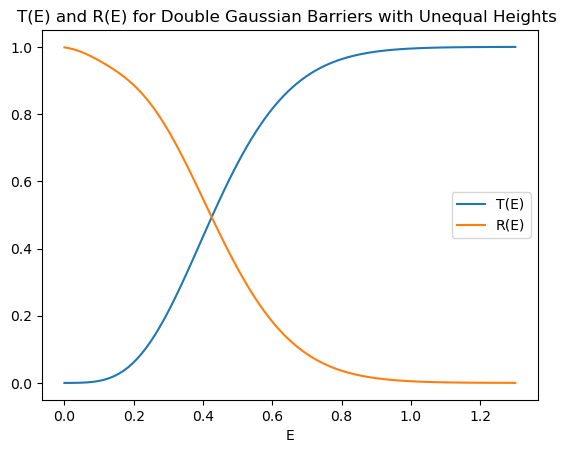

In [11]:
#specify x grid
N = 2 ** 11 #2048
dx = 0.1
# x = dx * (np.arange(N) - 0.5 * N)
x=np.arange(-800,800,0.1)
dy = dx
y = x
#potential barrier
def gauss_barrier(x, a, x0):
    return (a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x-20) - x0)*1./a) ** 2)+ 0.5*(a * np.sqrt(np.pi))** (-0.5) * np.exp(-0.5 * (((x+20) - x0)*1./a) ** 2)

V_x = gauss_barrier(x, 3, 0)
V0 = np.max(V_x)

#potential 'walls' at either end
# V_x[x < -198] = 1E6 
# V_x[x > 198] = 1E6

#variables
dt = 0.01
N_steps = 50
t_max = 200
frames = 651

energies = np.linspace(0, 3*V0, 100)

reflections = []
transmissions = []

for E in energies:    
    #specifying constants
    hbar = 1.0  
    m = 1.0 #mass    
    p0 = np.sqrt(2 * m  * E) #intial momentum
    k0 = p0 / hbar #intial wave number
    v0 = p0 / m #initial velocity
    d = 4.0 #initial width of wavepacket
    x0 = -40 #initial centre of wavepacket 
    k0_ft_y = -np.pi / dy

    psi_x0 = gauss_x(x, d, x0, k0)

    inputpsi = psi_x0
#     S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
    
    for i in range(frames):
        S = Schrodinger(x=x, psi_x0=inputpsi, V_x=V_x, hbar=hbar, m=m, k0=-28)
        S.time_step(dt, N_steps)
        inputpsi = S.psi_x
        
    index = []
    for i in range(len(x)):
        if V_x[i]>0.01:
            index.append(i)
    
    modsquared = np.abs(inputpsi)**2

    reflection = np.sum(modsquared[0:np.min(index)-1])*0.1
    transmission = np.sum(modsquared[np.max(index):-1])*0.1
    
    reflections.append(reflection)
    transmissions.append(transmission)
    


plt.plot(energies,transmissions, label = 'T(E)')    
plt.plot(energies,reflections, label = 'R(E)')
plt.title('T(E) and R(E) for Double Gaussian Barriers with Unequal Heights ')
plt.xlabel('E')
plt.legend()
plt.savefig('RandT_Unequal_Double', dpi=500)



#creating the schrodinger object
S = Schrodinger(x=x, psi_x0=psi_x0, V_x=V_x, hbar=hbar, m=m, k0=-28)
